---
##          EPL Player Statistical Analysis of data sourced from FBREF.com
---

## Part 2 - Data Analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('C:\\Users\\Documents\\Prem_Players_Data_Analysis_Ready.csv', index_col=False)
df.head()

,Team,Name,Nation,Pos,Age,MP,Starts,Mins,90s,Gls,...,SoT/90,G/SoT,Dist,FK,Ast,Ast/90,PK,CrdY,CrdY/90,CrdR
0,Liverpool,Alisson,BRA,GK,30-152,24,24,2160.0,24.0,0.0,...,0.00,0.00,0.0,0,1.0,0.04,0.0,0.0,0.00,0.0
1,Liverpool,Mohamed Salah,EGY,FW,30-261,24,24,2135.0,23.7,9.0,...,1.26,0.30,14.9,2,5.0,0.21,0.0,0.0,0.00,0.0
2,Liverpool,Trent Alexander-Arnold,ENG,DF,24-147,24,21,1779.0,19.8,1.0,...,0.20,0.25,22.6,4,2.0,0.10,0.0,3.0,0.15,0.0
3,Liverpool,Virgil van Dijk,NED,DF,31-238,20,20,1755.0,19.5,3.0,...,0.36,0.43,11.9,0,0.0,0.00,0.0,1.0,0.05,0.0
4,Liverpool,Andrew Robertson,SCO,DF,28-357,21,18,1592.0,17.7,0.0,...,0.06,0.00,14.5,0,5.0,0.28,0.0,2.0,0.11,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Team     579 non-null    object 
 1   Name     579 non-null    object 
 2   Nation   579 non-null    object 
 3   Pos      579 non-null    object 
 4   Age      579 non-null    object 
 5   MP       579 non-null    int64  
 6   Starts   579 non-null    int64  
 7   Mins     579 non-null    float64
 8   90s      579 non-null    float64
 9   Gls      579 non-null    float64
 10  Gls/90   579 non-null    float64
 11  xG       579 non-null    float64
 12  xG/90    579 non-null    float64
 13  Sh       579 non-null    int64  
 14  Sh/90    579 non-null    float64
 15  G/Sh     579 non-null    float64
 16  SoT      579 non-null    int64  
 17  SoT%     579 non-null    float64
 18  SoT/90   579 non-null    float64
 19  G/SoT    579 non-null    float64
 20  Dist     579 non-null    float64
 21  FK       579 non

In [4]:
# summary statistics
df.describe()

,MP,Starts,Mins,90s,Gls,Gls/90,xG,xG/90,Sh,Sh/90,...,SoT/90,G/SoT,Dist,FK,Ast,Ast/90,PK,CrdY,CrdY/90,CrdR
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,...,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,561.000000,579.000000
mean,12.770294,9.388601,844.645941,9.386528,1.115717,0.101641,1.182902,0.129136,10.668394,1.212245,...,0.374940,0.152504,13.613817,0.341969,0.758204,0.067081,0.079447,1.576857,0.175775,0.032815
std,7.989012,8.172192,697.553332,7.751052,2.379718,0.224556,1.975858,0.170584,13.968844,1.374344,...,0.587061,0.241265,8.314353,1.232693,1.410630,0.136821,0.404014,1.841153,0.252903,0.178307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,2.000000,198.000000,2.200000,0.000000,0.000000,0.000000,0.010000,1.000000,0.210000,...,0.000000,0.000000,9.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,7.000000,684.000000,7.600000,0.000000,0.000000,0.400000,0.060000,5.000000,0.850000,...,0.170000,0.000000,14.800000,0.000000,0.000000,0.000000,0.000000,1.000000,0.120000,0.000000
75%,20.000000,16.000000,1427.500000,15.850000,1.000000,0.130000,1.400000,0.180000,15.000000,1.865000,...,0.560000,0.290000,19.250000,0.000000,1.000000,0.090000,0.000000,3.000000,0.250000,0.000000
max,25.000000,25.000000,2250.000000,25.000000,27.000000,2.770000,18.700000,1.140000,86.000000,12.860000,...,7.500000,1.000000,34.100000,10.000000,12.000000,1.380000,4.000000,10.000000,2.500000,1.000000


In [5]:
# check for null values in data frame
df.isna().sum()

Team        0
Name        0
Nation      0
Pos         0
Age         0
MP          0
Starts      0
Mins        0
90s         0
Gls         0
Gls/90      0
xG          0
xG/90       0
Sh          0
Sh/90       0
G/Sh        0
SoT         0
SoT%        0
SoT/90      0
G/SoT       0
Dist        0
FK          0
Ast         0
Ast/90      0
PK          0
CrdY        0
CrdY/90    18
CrdR        0
dtype: int64

#### Goals / Cards Breakdown

In [6]:
# Total Goals
Total_Goals = df['Gls'].sum()
Total_CrdY = df['CrdY'].sum()
Total_CrdR = df['CrdR'].sum()
print('Total Goals so far: ',int(Total_Goals))
print('Total Yellows so far: ', int(Total_CrdY))
print('Total Reds so far: ', int(Total_CrdR))

Total Goals so far:  646
Total Yellows so far:  913
Total Reds so far:  19


#### Penalties

In [7]:
# Penalties
Total_Pens = df['PK'].sum()
print('The number of penalties scored: ', int(Total_Pens))
print('As a % of total goals: ', round(Total_Pens / Total_Goals, 2))

The number of penalties scored:  46
As a % of total goals:  0.07


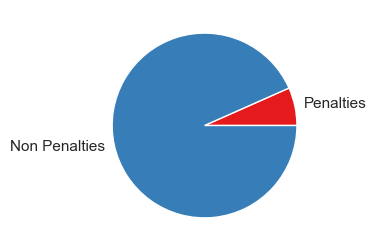

In [51]:
# Pie chart for Pens scored

plt.figure(figsize=(10,3))
data = [Total_Pens, Total_Goals]
labels = ['Penalties', 'Non Penalties']
color = sns.color_palette('Set1')
plt.pie(data, labels = labels, colors = color)
plt.show()


#### Player Representation by Nationality

In [9]:
# How many different nations were represented
Distinct_Nations = np.size((df['Nation'].unique()))
print('Number of distinct nations represented: ',Distinct_Nations)

Number of distinct nations represented:  62


<AxesSubplot:title={'center':'Top 10 Most Represented Nations'}, xlabel='Nation'>

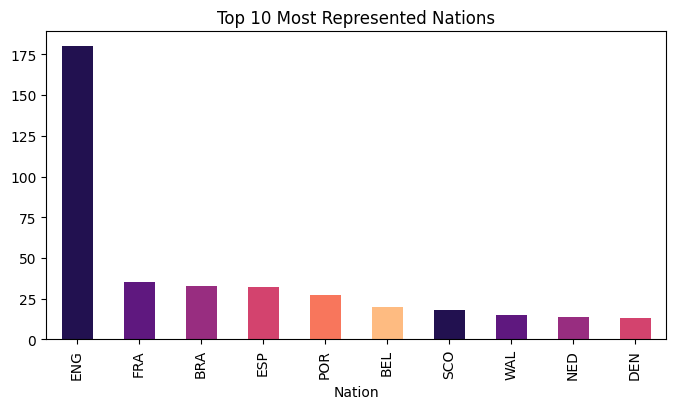

In [10]:
# Most nations most represented
nationality = df.groupby('Nation').size().sort_values(ascending=False)
nationality.head(10).plot(kind = 'bar', title = 'Top 10 Most Represented Nations', figsize=(8,4), color=sns.color_palette('magma'))

#### Most Squad Utilization

<AxesSubplot:title={'center':'Clubs who have utilized most of players'}>

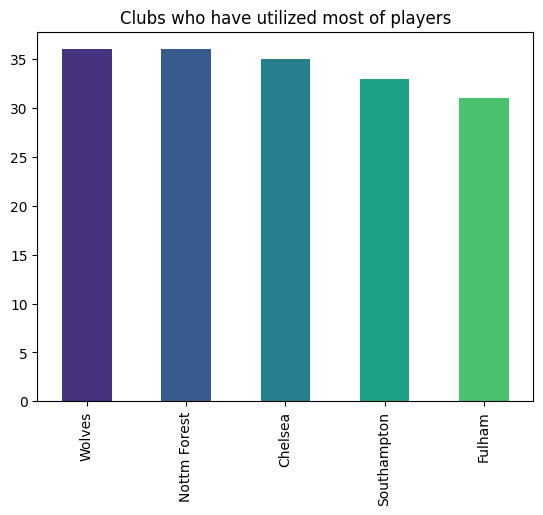

In [11]:
# Clubs who have used most players
df['Team'].value_counts().nlargest(5).plot(kind = 'bar', title = 'Clubs who have utilized most of players', color=sns.color_palette('viridis'))

#### Least Squad Utilization

<AxesSubplot:title={'center':'Clubs who have utilized least no. of players'}>

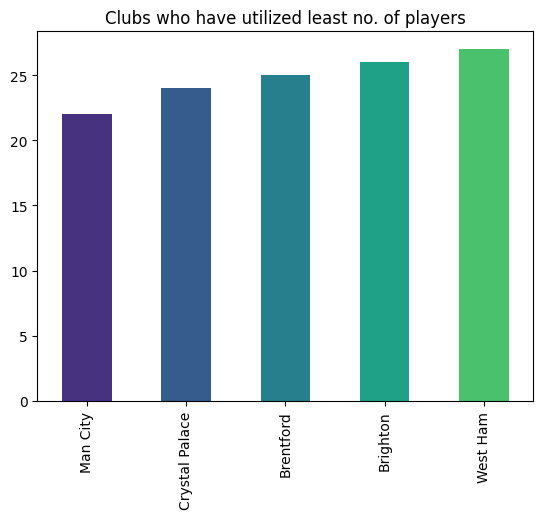

In [12]:
# Clubs who have used least players
df['Team'].value_counts().nsmallest(5).plot(kind = 'bar', title = 'Clubs who have utilized least no. of players', color=sns.color_palette('viridis'))

#### Age Analysis

In [13]:
# # Players based on age group
# firstly reformat 'Age' column to remove days
Ages = []
for string in df['Age']:
    new_age = string[:2]
    Ages.append(new_age)
df['Age'] = Ages
df['Age'] = df['Age'].astype(int)


In [14]:
# group players into age buckets

Under23 = df[df['Age'] <= 22]
age23_26 = df[df['Age'] > 22 & (df['Age'] <=26)]
age27_30 = df[df['Age'] > 26 & (df['Age'] <=30)]
Above30 = df[df['Age'] > 30]




#### Youngest Players

In [15]:
# Top 5 youngest players
Under23.sort_values(by='Age').head(5)

,Team,Name,Nation,Pos,Age,MP,Starts,Mins,90s,Gls,...,SoT/90,G/SoT,Dist,FK,Ast,Ast/90,PK,CrdY,CrdY/90,CrdR
63,Arsenal,Ethan Nwaneri,ENG,FW,15,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,0.0
89,Man Utd,Kobbie Mainoo,ENG,MF,17,1,0,11.0,0.1,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
314,Crystal Palace,David Ozoh,0,FW,17,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,0.0
25,Liverpool,Ben Doak,SCO,FW,17,2,0,26.0,0.3,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
231,Fulham,Luke Harris,WAL,"MF,FW",17,3,0,13.0,0.1,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Oldest Players

In [16]:
# Top 5 oldest players
Above30.sort_values(by='Age', ascending=False).head(5)

,Team,Name,Nation,Pos,Age,MP,Starts,Mins,90s,Gls,...,SoT/90,G/SoT,Dist,FK,Ast,Ast/90,PK,CrdY,CrdY/90,CrdR
84,Man Utd,Cristiano Ronaldo,POR,FW,38,10,4,525.0,5.8,1.0,...,1.03,0.17,17.7,1,0.0,0.00,0.0,2.0,0.34,0.0
259,Chelsea,Thiago Silva,BRA,DF,38,21,20,1812.0,20.1,0.0,...,0.05,0.00,11.9,0,2.0,0.10,0.0,1.0,0.05,0.0
327,Aston Villa,Ashley Young,ENG,DF,37,18,14,1267.0,14.1,1.0,...,0.14,0.50,27.2,0,0.0,0.00,0.0,3.0,0.21,0.0
14,Liverpool,James Milner,ENG,"DF,MF",37,18,6,681.0,7.6,0.0,...,0.13,0.00,16.2,0,1.0,0.13,0.0,1.0,0.13,0.0
446,West Ham,Lukasz Fabianski,POL,GK,37,24,24,2031.0,22.6,0.0,...,0.00,0.00,0.0,0,0.0,0.00,0.0,0.0,0.00,0.0


#### Demographic Visual

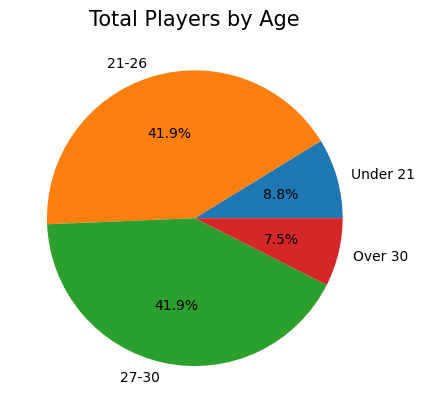

In [17]:
x = np.array([Under23['Name'].count(), age23_26['Name'].count(), age27_30['Name'].count(), Above30['Name'].count()])
mylabels = ['Under 21', '21-26', '27-30', 'Over 30']
plt.title('Total Players by Age', fontsize = 15)
plt.pie(x,labels = mylabels, autopct='%.1f%%')
plt.show()

#### Clubs with most U23 Player Appearances

<AxesSubplot:>

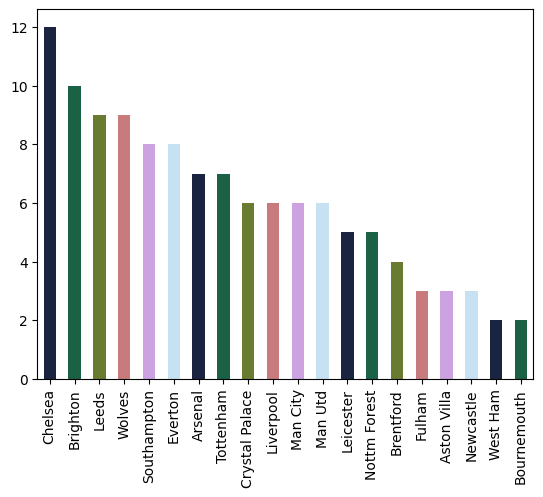

In [18]:
# Total under 23 players utilized by each club
players_under_23 = df[df['Age']<=22]
players_under_23['Team'].value_counts().plot(kind = 'bar', color = sns.color_palette('cubehelix'))

#### Breakdown of U23 players by Individual Club

In [19]:
# Under 23 players for Leeds
players_under_23[players_under_23['Team']=='Leeds']

,Team,Name,Nation,Pos,Age,MP,Starts,Mins,90s,Gls,...,SoT/90,G/SoT,Dist,FK,Ast,Ast/90,PK,CrdY,CrdY/90,CrdR
470,Leeds,Brenden Aaronson,USA,"MF,FW",22,23,20,1718.0,19.1,1.0,...,0.26,0.20,18.8,2,2.0,0.10,0.0,2.0,0.10,0.0
477,Leeds,Degnand Gnonto,ITA,"FW,MF",19,13,11,956.0,10.6,2.0,...,0.66,0.29,18.6,0,1.0,0.09,0.0,4.0,0.38,0.0
481,Leeds,Crysencio Summerville,NED,FW,21,17,7,853.0,9.5,4.0,...,0.84,0.50,15.1,0,1.0,0.11,0.0,2.0,0.21,0.0
486,Leeds,Sam Greenwood,ENG,"MF,FW",21,14,2,328.0,3.6,1.0,...,0.55,0.50,24.3,5,2.0,0.55,0.0,1.0,0.28,0.0
488,Leeds,Joe Gelhardt,ENG,FW,20,15,1,212.0,2.4,0.0,...,0.85,0.00,23.5,1,2.0,0.85,0.0,1.0,0.42,0.0
489,Leeds,Cody Drameh,ENG,DF,21,1,1,69.0,0.8,0.0,...,0.00,0.00,0.0,0,0.0,0.00,0.0,0.0,0.00,0.0
491,Leeds,Georginio Rutter,FRA,"FW,MF",20,5,0,114.0,1.3,0.0,...,0.00,0.00,21.7,0,0.0,0.00,0.0,0.0,0.00,0.0
492,Leeds,Darko Gyabi,ENG,FW,19,1,0,8.0,0.1,0.0,...,0.00,0.00,17.8,0,0.0,0.00,0.0,0.0,0.00,0.0
493,Leeds,Mateo Fernandez,ESP,"FW,MF",19,2,0,3.0,0.0,0.0,...,0.00,0.00,0.0,0,0.0,0.00,0.0,0.0,NaN,0.0


In [20]:
# Under 23 players for Southampton
players_under_23[players_under_23['Team']=='Man Utd']

,Team,Name,Nation,Pos,Age,MP,Starts,Mins,90s,Gls,...,SoT/90,G/SoT,Dist,FK,Ast,Ast/90,PK,CrdY,CrdY/90,CrdR
74,Man Utd,Jadon Sancho,ENG,"FW,MF",22,13,11,851.0,9.5,4.0,...,0.63,0.67,14.4,0,1.0,0.11,0.0,0.0,0.00,0.0
83,Man Utd,Anthony Elanga,SWE,FW,20,15,5,420.0,4.7,0.0,...,0.86,0.00,13.8,0,1.0,0.21,0.0,0.0,0.00,0.0
85,Man Utd,Alejandro Garnacho,ESP,FW,18,13,4,403.0,4.5,2.0,...,1.34,0.33,16.1,0,2.0,0.45,0.0,2.0,0.44,0.0
88,Man Utd,Facundo Pellistri,URU,FW,21,1,0,32.0,0.4,0.0,...,0.00,0.00,0.0,0,0.0,0.00,0.0,0.0,0.00,0.0
89,Man Utd,Kobbie Mainoo,ENG,MF,17,1,0,11.0,0.1,0.0,...,0.00,0.00,0.0,0,0.0,0.00,0.0,0.0,0.00,0.0
92,Man Utd,James Garner,ENG,MF,21,0,0,0.0,0.0,0.0,...,0.63,0.00,22.4,0,0.0,0.00,0.0,0.0,NaN,0.0


#### Average Age of Players by Club

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Liverpool'),
  Text(1, 0, 'Arsenal'),
  Text(2, 0, 'Chelsea'),
  Text(3, 0, 'Brighton'),
  Text(4, 0, 'Crystal Palace'),
  Text(5, 0, 'Fulham'),
  Text(6, 0, 'Man Utd'),
  Text(7, 0, 'Newcastle'),
  Text(8, 0, 'Everton'),
  Text(9, 0, 'Nottm Forest'),
  Text(10, 0, 'Tottenham'),
  Text(11, 0, 'Man City'),
  Text(12, 0, 'Leeds'),
  Text(13, 0, 'Brentford'),
  Text(14, 0, 'Leicester'),
  Text(15, 0, 'Aston Villa'),
  Text(16, 0, 'West Ham'),
  Text(17, 0, 'Wolves'),
  Text(18, 0, 'Southampton'),
  Text(19, 0, 'Bournemouth')])

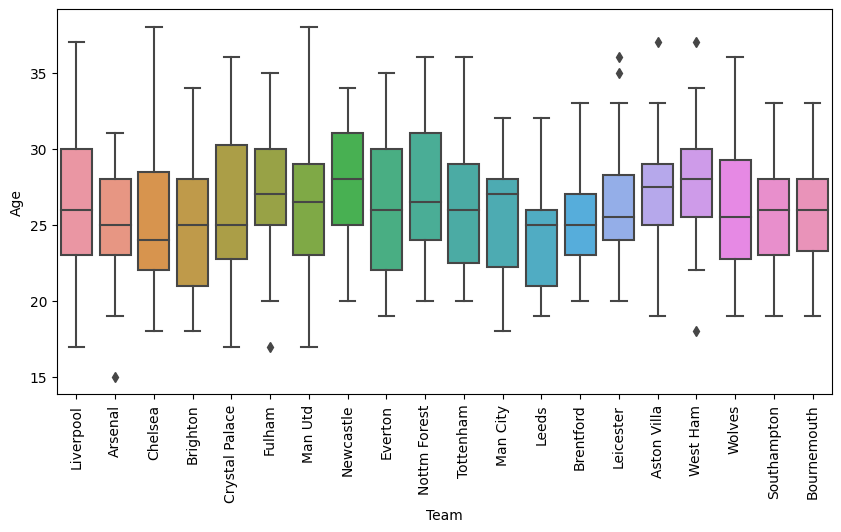

In [21]:
# Average age of players for each club
plt.figure(figsize=(10,5))
sns.boxplot(x= 'Team', y='Age', data = df)
plt.xticks(rotation=90)

In [22]:
# Average age of players per club
num_player = df.groupby('Team').size()
data = (df.groupby('Team')['Age'].sum())/num_player
round(data.sort_values(ascending=False),1)

Team
West Ham          27.9
Newcastle         27.7
Nottm Forest      27.6
Fulham            27.2
Aston Villa       27.1
Bournemouth       26.3
Tottenham         26.3
Man Utd           26.2
Leicester         26.2
Man City          26.1
Wolves            26.0
Liverpool         26.0
Everton           25.9
Crystal Palace    25.9
Brentford         25.6
Chelsea           25.3
Southampton       25.2
Arsenal           25.1
Brighton          24.9
Leeds             24.7
dtype: float64

#### Shots on Target by Team

Text(0.5, 1.0, 'Shots on Target')

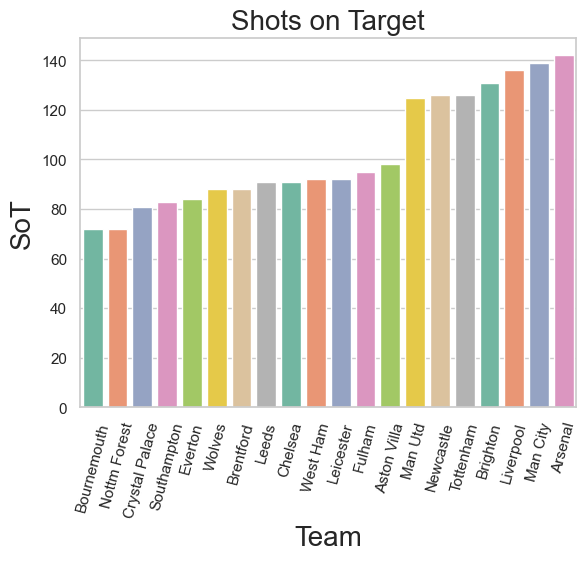

In [23]:
# Total Shots on target per team  - video min 42.42

SoT = pd.DataFrame(df.groupby('Team', as_index=False)['SoT'].sum())
sns.set_theme(style='whitegrid',color_codes=True)
ax = sns.barplot(x='Team', y='SoT', data=SoT.sort_values(by='SoT'),palette='Set2')
ax.set_xlabel('Team',fontsize=20)
ax.set_ylabel('SoT', fontsize=20)
plt.xticks(rotation=75)
plt.rcParams['figure.figsize']=(10,4)
plt.title('Shots on Target',fontsize=20)


#### Top Goalscorers

In [24]:
# Top 10 goalscorers

Top10_Goals = df[['Name','Team', 'MP', 'Gls','Gls/90']].nlargest(n=10, columns = 'Gls')
Top10_Goals

,Name,Team,MP,Gls,Gls/90
157,Erling Haaland,Man City,24,27.0,1.26
128,Harry Kane,Tottenham,25,18.0,0.72
66,Marcus Rashford,Man Utd,24,14.0,0.65
239,Ivan Toney,Brentford,21,14.0,0.67
33,Martinelli,Arsenal,25,11.0,0.49
210,Aleksandar Mitrovic,Fulham,19,11.0,0.61
30,Bukayo Saka,Arsenal,25,10.0,0.42
96,Miguel Almiron,Newcastle,23,10.0,0.48
474,Rodrigo,Leeds,18,10.0,0.69
1,Mohamed Salah,Liverpool,24,9.0,0.38


#### Top Assists

In [25]:
# Top 10 assists

Top10_Assists = df[['Name','Team', 'MP', 'Ast','Ast/90']].nlargest(n=10, columns = 'Ast')
Top10_Assists

,Name,Team,MP,Ast,Ast/90
158,Kevin De Bruyne,Man City,23,12.0,0.58
30,Bukayo Saka,Arsenal,25,9.0,0.38
69,Christian Eriksen,Man Utd,19,7.0,0.42
32,Martin Odegaard,Arsenal,24,6.0,0.27
65,Bruno Fernandes,Man Utd,23,6.0,0.26
204,Andreas Pereira,Fulham,25,6.0,0.26
495,Alex Iwobi,Everton,25,6.0,0.24
1,Mohamed Salah,Liverpool,24,5.0,0.21
4,Andrew Robertson,Liverpool,21,5.0,0.28
31,Granit Xhaka,Arsenal,25,5.0,0.21


#### Top Shot Takers

In [26]:
#Top 10 Shots

Top10_Shots = df[['Name','Team', 'MP', 'Sh','Sh/90']].nlargest(n=10, columns = 'Sh')
Top10_Shots

,Name,Team,MP,Sh,Sh/90
128,Harry Kane,Tottenham,25,86,3.46
157,Erling Haaland,Man City,24,79,3.68
210,Aleksandar Mitrovic,Fulham,19,76,4.19
1,Mohamed Salah,Liverpool,24,75,3.16
7,Darwin Nunez,Liverpool,18,71,5.31
66,Marcus Rashford,Man Utd,24,66,3.04
30,Bukayo Saka,Arsenal,25,60,2.51
32,Martin Odegaard,Arsenal,24,59,2.61
33,Martinelli,Arsenal,25,58,2.60
239,Ivan Toney,Brentford,21,58,2.78


#### Players Most Carded

In [27]:
#Top 10 yellows

Top10_Y = df[['Name','Team', 'MP', 'CrdY','CrdY/90']].nlargest(n=10, columns = 'CrdY')
Top10_Y

,Name,Team,MP,CrdY,CrdY/90
205,Joao Palhinha,Fulham,24,10.0,0.42
100,Joelinton,Newcastle,21,9.0,0.46
134,Rodrigo Bentancur,Tottenham,18,8.0,0.48
239,Ivan Toney,Brentford,21,8.0,0.38
412,Ruben Neves,Wolves,24,8.0,0.33
519,Adam Smith,Bournemouth,23,8.0,0.37
137,Cristian Romero,Tottenham,16,7.0,0.46
204,Andreas Pereira,Fulham,25,7.0,0.30
206,Bobby Reid,Fulham,24,7.0,0.32
294,Marc Guehi,Crystal Palace,23,7.0,0.30


<AxesSubplot:title={'center':'Players with most Yellow Cards'}, xlabel='Name', ylabel='Number of Yellow Cards'>

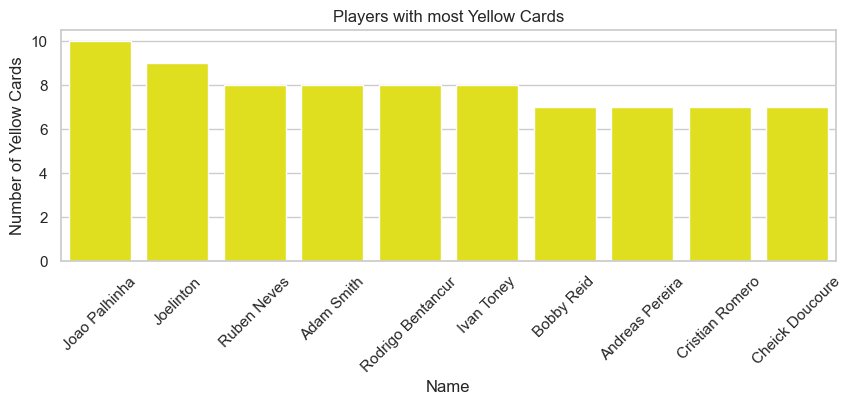

In [28]:
player_Y = df.sort_values(by='CrdY',ascending=False)[:10]
plt.figure(figsize=(10,3))
plt.title('Players with most Yellow Cards')
c=sns.barplot(x=player_Y['Name'], y=player_Y['CrdY'], label='Name', color='yellow')
plt.ylabel('Number of Yellow Cards')
c.set_xticklabels(c.get_xticklabels(),rotation=45)
c

#### Top Free-Kick Shot Takers

In [29]:
#Top 10 shots from Free Kicks

Top10_FK = df[['Name','Team', 'MP', 'FK']].nlargest(n=10, columns = 'FK')
Top10_FK

,Name,Team,MP,FK
204,Andreas Pereira,Fulham,25,10
551,James Ward-Prowse,Southampton,24,10
301,Eberechi Eze,Crystal Palace,24,9
94,Kieran Trippier,Newcastle,23,8
355,James Maddison,Leicester,17,8
412,Ruben Neves,Wolves,24,8
182,Alexis Mac Allister,Brighton,19,7
32,Martin Odegaard,Arsenal,24,6
158,Kevin De Bruyne,Man City,23,6
132,Son Heung-min,Tottenham,23,5


In [30]:
#Top 10 shots from distance - for players with 3 or more matches and 2 or more shots
df['Dist/Sh'] = df['Dist'] / df['Sh']
df_dist = df[df.MP >=3]
df_dist = df[df.Sh >=2]
Top10_dist = df_dist[['Name','Team', 'MP', 'Dist', 'Sh', 'Dist/Sh']].nlargest(n=10, columns = 'Dist/Sh')
Top10_dist = Top10_dist[Top10_dist.MP >=4]
Top10_dist

,Name,Team,MP,Dist,Sh,Dist/Sh
433,Mario Lemina,Wolves,6,31.2,2,15.600000
462,Manuel Lanzini,West Ham,6,31.0,2,15.500000
469,Tyler Adams,Leeds,22,29.4,2,14.700000
541,Ben Pearson,Bournemouth,7,25.2,2,12.600000
42,Jorginho,Arsenal,5,34.1,3,11.366667
44,Jorginho,Chelsea,18,34.1,3,11.366667
93,James Garner,Everton,6,22.4,2,11.200000
175,Kalvin Phillips,Man City,5,22.0,2,11.000000


#### Highest Scoring Teams

Text(0.5, 1.0, 'Plot of Club by Team Goals')

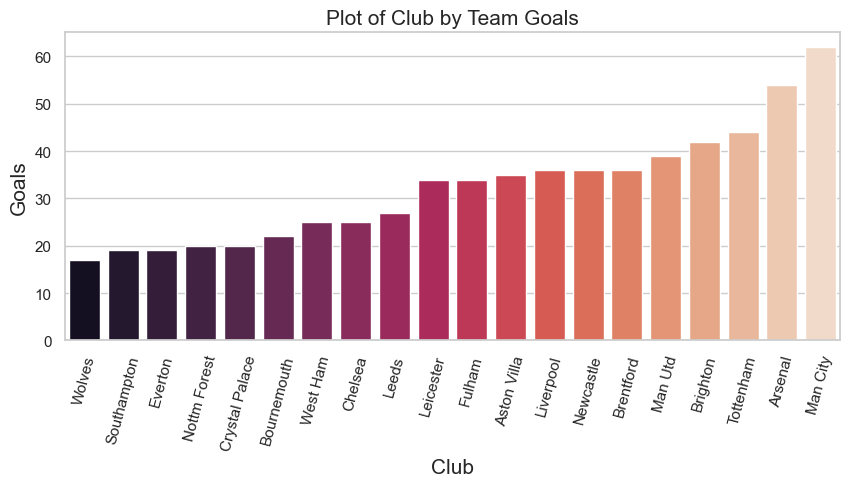

In [31]:
Goals_by_Club = pd.DataFrame(df.groupby('Team', as_index=False)['Gls'].sum())
sns.set_theme(style='whitegrid',color_codes=True)
ax = sns.barplot(x='Team', y='Gls', data=Goals_by_Club.sort_values(by='Gls'),palette='rocket')
ax.set_xlabel('Club',fontsize=15)
ax.set_ylabel('Goals', fontsize=15)
plt.xticks(rotation=75)
plt.rcParams['figure.figsize']=(10,4)
plt.title('Plot of Club by Team Goals',fontsize=15)


#### Teams by XG

Text(0.5, 1.0, 'Plot of Club by XG')

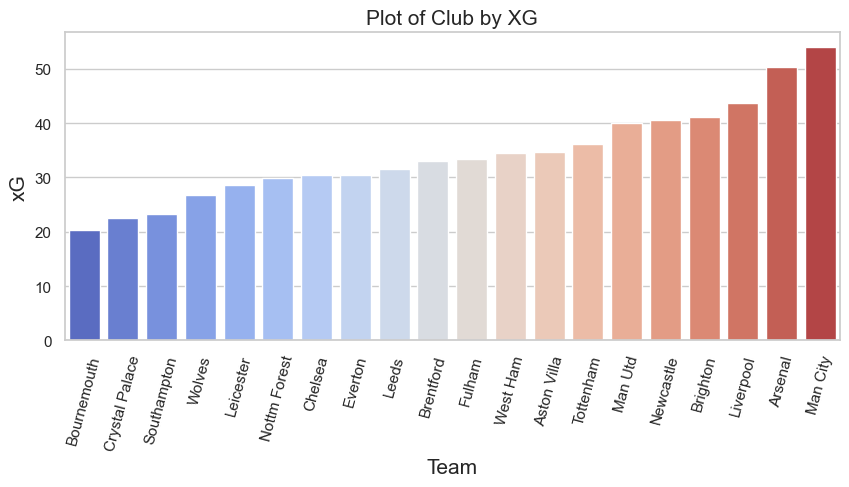

In [32]:
XG_by_Club = pd.DataFrame(df.groupby('Team', as_index=False)['xG'].sum())
sns.set_theme(style='whitegrid',color_codes=True)
ax = sns.barplot(x='Team', y='xG', data=XG_by_Club.sort_values(by='xG'),palette='coolwarm')
ax.set_xlabel('Team',fontsize=15)
ax.set_ylabel('xG', fontsize=15)
plt.xticks(rotation=75)
plt.rcParams['figure.figsize']=(10,4)
plt.title('Plot of Club by XG',fontsize=15)

#### Goals Assist Ratio

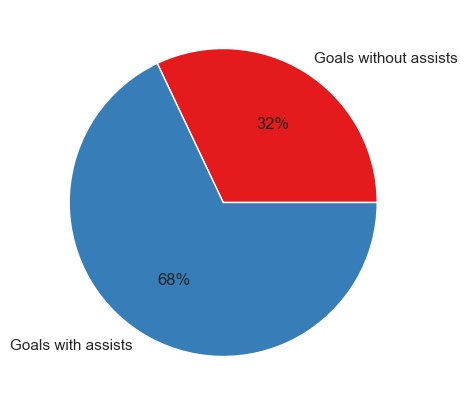

In [33]:
# Pie chart goals with assist and without assist

plt.figure(figsize=(10,5))
assists = df['Ast'].sum()
data = [Total_Goals - assists, assists]
labels = ['Goals without assists', 'Goals with assists']
color = sns.color_palette('Set1')
plt.pie(data, labels = labels, colors = color, autopct = '%.0f%%')
plt.show()

In [34]:
Top10_Min = df[['Name','Team', 'Mins']].nlargest(n=10, columns = 'Mins')
Top10_Min

,Name,Team,Mins
27,Gabriel Dos Santos,Arsenal,2250.0
28,Aaron Ramsdale,Arsenal,2250.0
155,Ederson,Man City,2250.0
410,Max Kilman,Wolves,2250.0
411,Jose Sa,Wolves,2250.0
494,James Tarkowski,Everton,2250.0
203,Tim Ream,Fulham,2247.0
29,William Saliba,Arsenal,2235.0
128,Harry Kane,Tottenham,2235.0
495,Alex Iwobi,Everton,2211.0


#### Plot of Players Most Minutes

<AxesSubplot:title={'center':'Players Most Minutes'}, xlabel='Name', ylabel='Mins'>

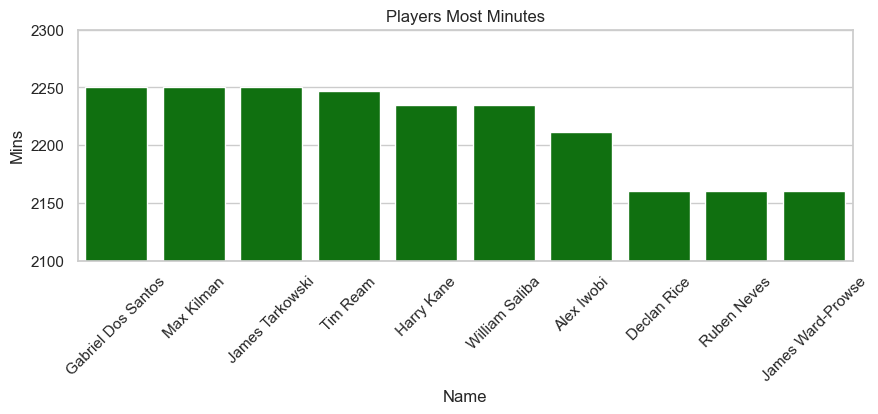

In [50]:
df_out = df.drop(df[df['Pos']=='GK'].index)
player_min = df_out.sort_values(by='Mins',ascending=False)[:10]
plt.figure(figsize=(10,3))
plt.title('Players Most Minutes')
c=sns.barplot(x=player_min['Name'], y=player_min['Mins'], label='Name', color='green')
plt.ylabel('Mins')
plt.ylim(2100, 2300)
c.set_xticklabels(c.get_xticklabels(),rotation=45)
c
